# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Global Methods

In [2]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
        
def maxDiff(A, B):
    mx = np.max(A-B)
    mn = np.min(A-B)
    return max(abs(mn), abs(mx))

# Dataset

## Data Description

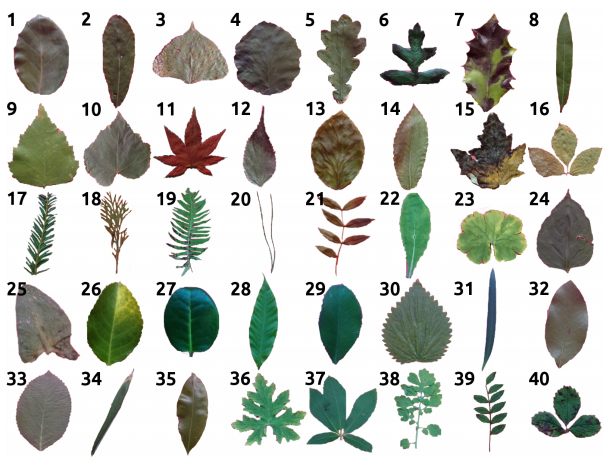

Linhas x atributos
(340, 15)

1. Class (Species)
2. Specimen Number
3. Eccentricity
4. Aspect Ratio
5. Elongation
6. Solidity
7. Stochastic Convexity
8. Isoperimetric Factor
9. Maximal Indentation Depth
10. Lobedness
11. Average Intensity
12. Average Contrast
13. Smoothness
14. Third moment
15. Uniformity
16. Entropy




## Data acquisition

In [3]:
columns = [
"Class (Species)",
"Specimen Number",
"Eccentricity",
"Aspect Ratio",
"Elongation",
"Solidity",
"Stochastic Convexity",
"Isoperimetric Factor",
"Maximal Indentation Depth",
"Lobedness",
"Average Intensity",
"Average Contrast",
"Smoothness",
"Third moment",
"Uniformity",
"Entropy"]

leaf_df=pd.read_csv("leaf.csv", names = columns).drop("Specimen Number", axis=1)
y=leaf_df.iloc[:,0:1]
X=leaf_df.iloc[:,1:]

In [4]:
leaf_df.head()
print(leaf_df.shape)

(340, 15)


## Questions

### First
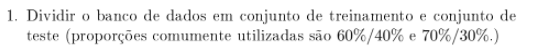

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101) 

### Second
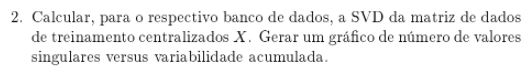

#### Centralizing the data

In [6]:
def _centralizes_data(X):
    cent_X=X-X.mean()
    return cent_X

In [7]:
cent_train_X=_centralizes_data(X_train)
cent_train_X.head()

Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
232      0.088529     -0.798079   -0.106232   0.09211              0.061071   
83      -0.162371     -1.179679   -0.204492   0.03656              0.059321   
210      0.119589     -0.819979   -0.021052   0.02844              0.029491   
18       0.140509     -0.498179   -0.026222   0.08869              0.061071   
200     -0.265031     -1.242279   -0.312852   0.07351              0.052301   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
232              0.293739                  -0.033751  -0.544884   
83               0.075809                  -0.020682  -0.490504   
210              0.104029                   0.006683  -0.175258   
18               0.181409                  -0.034674  -0.546375   
200              0.279679                  -0.022471  -0.501620   

     Average Intensity  Average Contrast  Smoothness  Third moment  \
232          -0.024933         -0.036746   -0.010341     -0.003745   
83           -0.009941         -0.002704   -0.003158     -0.001142   
210           0.080604          0.137046    0.046968      0.023540   
18           -0.033368         -0.056913   -0.013562     -0.005018   
200          -0.032994         -0.053639   -0.013092     -0.004859   

     Uniformity   Entropy  
232   -0.000275 -0.203147  
83     0.000013 -0.245317  
210    0.000333  0.557813  
18    -0.000262 -0.449747  
200   -0.000249 -0.527257

In [8]:
cent_test_X=_centralizes_data(X_test)
cent_test_X.head()

Eccentricity  Aspect Ratio  Elongation  Solidity  Stochastic Convexity  \
172      0.164358     -0.068117    0.074985  0.039808              0.018537   
38      -0.348322     -1.281817   -0.339495  0.044428              0.044857   
242      0.130808     -0.256817    0.028285  0.059178              0.044857   
64       0.123648     -0.611817    0.046175 -0.042172              0.015037   
181      0.225308      1.405783    0.232845 -0.093962             -0.007773   

     Isoperimetric Factor  Maximal Indentation Depth  Lobedness  \
172              0.000868                  -0.010762  -0.363701   
38               0.239568                  -0.022543  -0.439395   
242              0.101688                  -0.013977  -0.389368   
64              -0.027812                  -0.004749  -0.305591   
181             -0.225252                   0.110296   3.340629   

     Average Intensity  Average Contrast  Smoothness  Third moment  \
172          -0.000130          0.017307    0.002120      0.001489   
38           -0.020618         -0.038812   -0.009524     -0.003656   
242           0.035279          0.070237    0.018274      0.008025   
64           -0.018144         -0.024157   -0.007054     -0.002029   
181          -0.023312         -0.015543   -0.005411     -0.000557   

     Uniformity   Entropy  
172   -0.000086 -0.100997  
38    -0.000174 -0.062697  
242    0.000030  0.365303  
64    -0.000211 -0.099197  
181   -0.000287 -0.573547

#### Calculating the covariance matrix and spectral decomposition

In [9]:
def _normal_cov_matrix(aT, a):
    m = a.shape[0]
    cov_matrix = np.dot(aT, a)/(m-1)
    
    return cov_matrix

def _inverted_cov_matrix(a, aT):
    m = a.shape[0]
    cov_matrix = np.dot(a, aT)/(m-1)
    
    return cov_matrix

def _spectral_decomposition(cov_matrix):
    
    spectral_decomposition=np.linalg.eigh(cov_matrix)
    
    w=spectral_decomposition[0]
    Q=spectral_decomposition[1]
    
#     w[::-1].sort()
#     Q=np.fliplr(Q)
    
    index = np.argsort(w)[::-1]
    w=w[index]
    Q=Q[:,index]
    
    return w,Q

In [10]:
begin_time = datetime.datetime.now()
cov_matrix = _normal_cov_matrix(cent_train_X.T, cent_train_X)

print("Cov. matrix shape = {}".format(cov_matrix.shape))

w, Q = _spectral_decomposition(cov_matrix)

print("Time: {}".format(datetime.datetime.now() - begin_time))

print("---------------------------------------------------------------------")
print("w-> {}".format(w))
print("---------------------------------------------------------------------")
print("Q-> {}".format(Q))
print("---------------------------------------------------------------------")

Cov. matrix shape = (14, 14)
Time: 0:00:00.035578
---------------------------------------------------------------------
w-> [7.40826087e+00 1.12271399e+00 3.17609012e-01 3.65709087e-02
 2.93400385e-02 3.57421724e-03 1.80751995e-03 1.05327541e-03
 8.59481237e-04 6.56532419e-05 3.78518866e-05 4.22484658e-06
 8.48956085e-08 1.00262305e-08]
---------------------------------------------------------------------
Q-> [[-4.29754639e-02  6.34534208e-02  5.04476896e-02 -5.50857885e-01
  -7.12278385e-01 -1.00491404e-01  3.95933763e-01  1.16748818e-01
  -1.41260542e-02 -1.60280601e-03  1.00220925e-02  1.40864525e-03
  -3.45468698e-05 -3.58589247e-05]
 [-9.92767626e-01  6.14088420e-02 -7.02330583e-02  7.14013920e-02
   1.07351351e-02  1.63069172e-02  1.45700679e-02 -8.94582012e-04
   3.83574621e-03  6.92578678e-04 -1.03457570e-03  2.10259050e-04
  -1.99522706e-05  7.08288861e-07]
 [-4.97473086e-02 -6.70762510e-02 -3.94727007e-02 -6.29440291e-01
   3.51973055e-02  3.12455015e-01 -6.29958467e-01 -3.03

#### Calculating Single Value Decomposition (SVD)

##### Little bit of theory

When a is a 2D array, it is factorized as u @ np.diag(s) @ vh = (u * s) @ vh, where u and vh are 2D unitary arrays and s is a 1D array of a’s singular values. When a is higher-dimensional, SVD is applied in stacked mode as explained below.

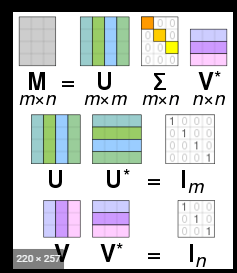
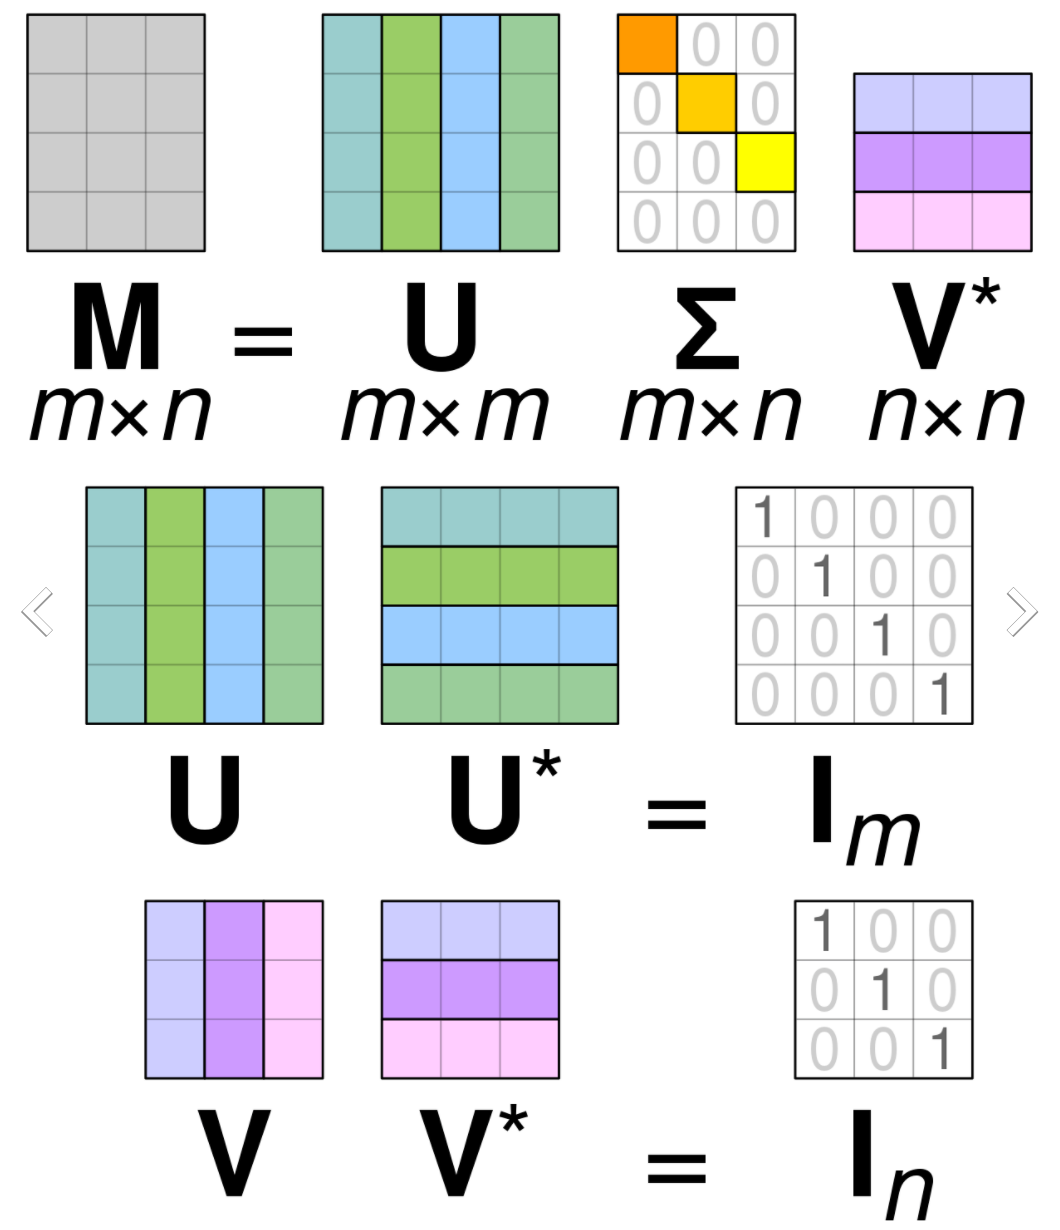

##### Full SVD
Não precisaria ser utilizada a completa visto que não temos MxN com m<n. Ou seja, existe mais caracteristicas do que coletas

In [11]:
begin_time = datetime.datetime.now()

U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=True)
print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))
print(datetime.datetime.now() - begin_time)

U.shape = (238, 238)
S length = 14
Vt.shape = (14, 14)
0:00:00.002823


##### Reduced SVD

- X = UˆSˆV.t
    - Uˆ  ́e uma matriz m × n, com colunas ortonormais;
    - Sˆ  ́e uma matriz n × n diagonal;
    - V  ́e uma matriz n × n ortogonal.
    - As colunas ortonormais de Uˆ s ̃ao os vetores singulares
esquerdos de X;
    - Os elementos da diagonal principal de Sˆ s ̃ao os valores
singulares de X.
    - As colunas ortonormais de V s ̃ao os vetores singulares
direitos de X.

In [12]:
cent_train_X.shape

(238, 14)

In [13]:
begin_time = datetime.datetime.now()

U,S,Vt = np.linalg.svd(cent_train_X, full_matrices=False)
print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))
print(datetime.datetime.now() - begin_time)

U.shape = (238, 14)
S length = 14
Vt.shape = (14, 14)
0:00:00.000631


##### Accumulated Variability

In [14]:
def _variabilidade_acumulada(S,r):
    variabilidade_acumulada = (np.sum(S[0:r]**2) / np.sum(S**2))*100
    return variabilidade_acumulada

##### Number of singular values versus accumulated variability Chart

variabilidade_acumulada 83.03459183915494 com r = 1
variabilidade_acumulada 95.61839514185483 com r = 2
variabilidade_acumulada 99.17827716597364 com r = 3
variabilidade_acumulada 99.5881777526391 com r = 4
variabilidade_acumulada 99.91703200987445 com r = 5
variabilidade_acumulada 99.95709318955667 com r = 6
variabilidade_acumulada 99.9773525572496 com r = 7
variabilidade_acumulada 99.98915806672541 com r = 8
variabilidade_acumulada 99.99879145774419 com r = 9
variabilidade_acumulada 99.99952732412878 com r = 10
variabilidade_acumulada 99.99995158240056 com r = 11
variabilidade_acumulada 99.99999893608009 com r = 12
variabilidade_acumulada 99.99999988762221 com r = 13
variabilidade_acumulada 100.0 com r = 14


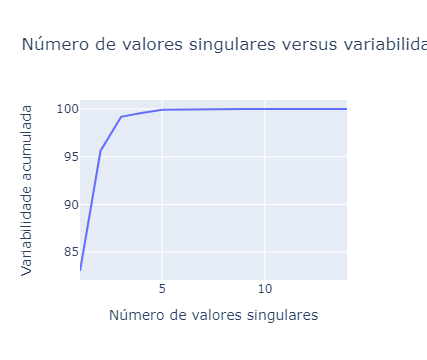

In [15]:
quant_max_features = cent_train_X.shape[1] #14
vari_acum_list = []
r_list = []

for r in range(1, quant_max_features+1):
    
    variabilidade_acumulada = _variabilidade_acumulada(S,r)
    print("variabilidade_acumulada {} com r = {}".format(variabilidade_acumulada,r))
    vari_acum_list.append(variabilidade_acumulada)
    r_list.append(r)

fig = px.line(x=r_list, y=vari_acum_list, title='Número de valores singulares versus variabilidade acumulada')
fig.update_layout(
    xaxis_title="Número de valores singulares",
    yaxis_title="Variabilidade acumulada")

fig.show()

In [16]:
vari_acum_list

[83.03459183915494,
 95.61839514185483,
 99.17827716597364,
 99.5881777526391,
 99.91703200987445,
 99.95709318955667,
 99.9773525572496,
 99.98915806672541,
 99.99879145774419,
 99.99952732412878,
 99.99995158240056,
 99.99999893608009,
 99.99999988762221,
 100.0]

R escolhido foi 5 permitindo uma redução de 64.28% de quantidade de features, mas permanecendo 99.917 dos "energia acumulada"

##### Validating with Sklearn (PCA)

###### Passing number of components

In [17]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(cent_train_X)

variabilidade_acumulada = pca.explained_variance_ratio_.sum()*100

variabilidade_acumulada = round(variabilidade_acumulada, 3)
print("Variabilidade Acumulada = {} com 5 componentes".format(variabilidade_acumulada))

Variabilidade Acumulada = 99.917 com 5 componentes


###### Passing value of accumulated variability

In [18]:
pca = PCA(variabilidade_acumulada/100)
principalComponents = pca.fit_transform(cent_train_X)

print("Variabilidade Acumulada de 99.917 gera {} componentes".format(principalComponents.shape[1]))

Variabilidade Acumulada de 99.917 gera 5 componentes


### Third
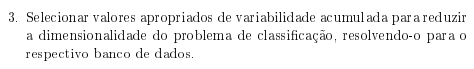

#### Reducing dimensionality

##### Choosing Appropriate Cumulative Variability Value

In [19]:
r = 5 # (99.917%)

##### Projecting on the projection hyperplane dimension r

In [20]:
def red_dim(r):
    return U[:,0:r] * S[0:r], np.dot(cent_test_X, Vt[0:r,:].T)

new_X_train, new_X_test = red_dim(r) #dim 5

##### Predicting using KNN model using the reduced dimension data

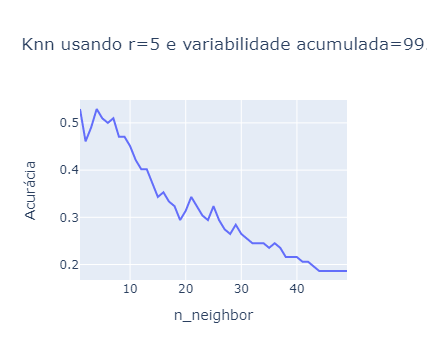

In [21]:
n_neighbor_list = []
acc_list = []

for i in range(1,50):
    
    n_neighbor_list.append(i)
    
#     knn = KNeighborsClassifier(n_neighbors=i, metric="mahalanobis", metric_params = {"V":_cov_matrix(new_X_train.T, new_X_train)})
    knn  = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(new_X_train, y_train.values.ravel())

    predictions = knn.predict(new_X_test)
#     variabilidade_acumulada = _variabilidade_acumulada(S, r)
    acc = accuracy_score(y_test, predictions)
    
    acc_list.append(acc)
    
fig = px.line(x=n_neighbor_list, y=acc_list, title='Knn usando r=5 e variabilidade acumulada=99.917')
fig.update_layout(
xaxis_title="n_neighbor",
yaxis_title="Acurácia")

fig.show()

In [22]:
number_neighbors_that_generate_maximum_acc = 4

##### Predicting using logistic regression model using the reduced dimension data

In [23]:
logisticRegr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logisticRegr.fit(new_X_train, y_train.values.ravel())

predictions=logisticRegr.predict(new_X_test)
accuracy_score(y_test, predictions)

0.3333333333333333

others models
https://machinelearningmastery.com/types-of-classification-in-machine-learning/

### Verifying that the reduced matrix using SVD is the same as Sklearn.PCA

In [24]:
r=5

red_matrix = U[:,0:r] * S[0:r]

pca = PCA(n_components= r)
principalComponents = pca.fit_transform(cent_train_X)

maxDiff(abs(principalComponents), abs(red_matrix))

1.176836406102666e-14

### Fourth
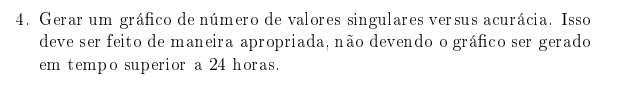

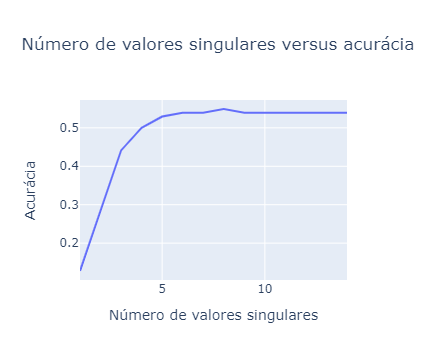

In [25]:
acc_list = []
r_list = []

for r in range(1, quant_max_features+1):
    new_X_train, new_X_test = red_dim(r)
#     knn = KNeighborsClassifier(n_neighbors= number_neighbors_that_generate_maximum_acc, metric="mahalanobis", metric_params = {"V":_cov_matrix(new_X_train.T, new_X_train)})
    knn  = KNeighborsClassifier(n_neighbors= number_neighbors_that_generate_maximum_acc) # 4 neighbors
    knn.fit(new_X_train, y_train.values.ravel()) 

    predictions = knn.predict(new_X_test)

    acc=accuracy_score(y_test, predictions)
    acc_list.append(acc)
    r_list.append(r)

fig = px.line(x=r_list, y=acc_list, title='Número de valores singulares versus acurácia')
fig.update_layout(
    xaxis_title="Número de valores singulares",
    yaxis_title="Acurácia"
)
fig.show()

## Tasks

### Fisrt
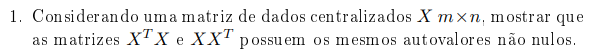

Relatório

### Second
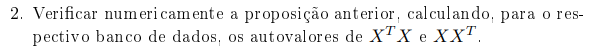

### Calculating covariance matrix

In [26]:
cent_train_X=_centralizes_data(X_train)
cent_test_X=_centralizes_data(X_test)

cov_matrix1 =_normal_cov_matrix(cent_train_X.T, cent_train_X)
print("XTX: {}".format(cov_matrix1.shape))

cov_matrix2 =_inverted_cov_matrix(cent_train_X, cent_train_X.T)
print("XXT: {}".format(cov_matrix2.shape))

XTX: (14, 14)
XXT: (238, 238)


### Calculating spectral decomposition

In [27]:
w1,_= _spectral_decomposition(cov_matrix1)
print("Eigenvalues of XTX: {}".format(w1.shape))

w2,_= _spectral_decomposition(cov_matrix2)
print("Eigenvalues of XXT: {}".format(w2.shape))

Eigenvalues of XTX: (14,)
Eigenvalues of XXT: (238,)


In [28]:
# cov_matrix = np.dot(cent_train_X.T, cent_train_X)/cent_train_X.shape[0]
# spectral_decomposition=np.linalg.eigh(cov_matrix)

# w1=spectral_decomposition[0]
# w1[::-1].sort()
# print(w1)

# print("-----------------------")
# cov_matrix = np.dot(cent_train_X, cent_train_X.T)/cent_train_X.shape[0]

# spectral_decomposition=np.linalg.eigh(cov_matrix)

# w2=spectral_decomposition[0]
# w2[::-1].sort()
# print(w2)

### Adjust sizes of Eigenvalues 

In [29]:
def adjust_to_same_len(w1, w2):
    len1 = len(w1)
    len2 = len(w2)
    
    delta = abs(len1-len2)
    
    if len1<len2:
        w1 = list(w1)
        w1.extend([0]*delta)
        w1=np.array(w1)
    else:
        w2 = list(w2)
        w2.extend([0]*delta)
        w2 = np.array(w2)
        
    return w1, w2


print("Adjust sizes")

w1, w2 = adjust_to_same_len(w1, w2)
print("Eigenvalues 1: {}".format(w1.shape))
print("Eigenvalues 2: {}".format(w2.shape))

Adjust sizes
Eigenvalues 1: (238,)
Eigenvalues 2: (238,)


### Check difference

In [30]:
maxDiff(abs(w1), abs(w2))

3.552713678800501e-15

### Third
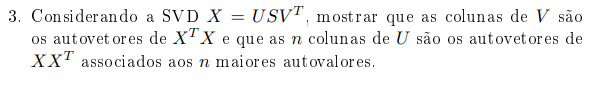

Relatório

### Fourth
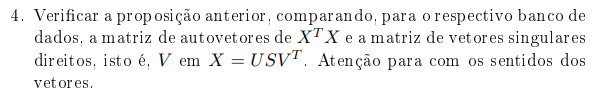

As linhas de v são os autovetores de a.H a. As colunas de u são os autovetores de a a.H. Para a linha i em ve coluna i em u, o autovalor correspondente é s [i] ** 2.

### Get Eigenvectors (Q)

In [31]:
cent_train_X = _centralizes_data(X_train)

cov_matrix=_normal_cov_matrix(cent_train_X.T, cent_train_X)
_,Q = _spectral_decomposition(cov_matrix)

print("Q {}".format(Q.shape))


# print("U.shape = {}".format(U.shape))
# print("S length = {}".format(len(S)))
# print("Vt.shape = {}".format(np.shape(Vt)))


# cov_matrix = np.dot(cent_train_X.T, cent_train_X)
# spectral_decomposition=np.linalg.eigh(cov_matrix)
# w=spectral_decomposition[0]
# w[::-1].sort()
# Q=spectral_decomposition[1]
# Q=np.fliplr(Q)

Q (14, 14)


In [32]:
def SVD_decomposition(X, _full_matrices):
    U,S,Vt = np.linalg.svd(X, full_matrices=_full_matrices)
#     index = np.argsort(S)[::-1]
#     S=S[index]
#     U=U[index]
#     Vt=Vt[index]
    return U,S,Vt

#### Get Singular vector matrix (Vt)

In [33]:
U,S,Vt = SVD_decomposition(cent_train_X, _full_matrices=True)

print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))

U.shape = (238, 238)
S length = 14
Vt.shape = (14, 14)


#### Comparing Q and VT

In [34]:
maxDiff(abs(Vt.T), abs(Q))

1.266209359584991e-13

In [35]:
cent_train_X = _centralizes_data(X_train)

cov_matrix=_inverted_cov_matrix(cent_train_X, cent_train_X.T)
w,Q = _spectral_decomposition(cov_matrix)

print("Q {}".format(Q.shape))

Q (238, 238)


In [36]:
w.shape

(238,)

In [37]:
U[1:2,0:14]

array([[ 0.02853835,  0.02455185, -0.04347266, -0.04225729, -0.05209636,
        -0.06994659,  0.00755667, -0.04446096, -0.01324416, -0.07513899,
        -0.00578497, -0.06616326, -0.01828698,  0.04049107]])

In [38]:
Q[1:2,0:14]

array([[-0.02853835,  0.02455185,  0.04347266,  0.04225729,  0.05209636,
         0.06994659,  0.00755667,  0.04446096, -0.01324416,  0.07513899,
         0.00578497, -0.06616326, -0.01828698,  0.04049107]])

In [39]:
maxDiff(abs(U[:,0:14]), abs(Q[:,0:14]))

1.5328752332732787e-07

### Fifth
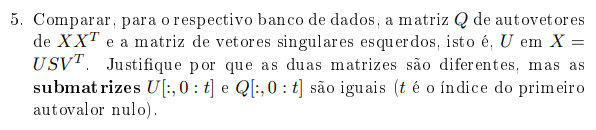

Vou justificar pela necessidade de fazer o SVD completa, dai ele tem que adicionar vetores u na U ortogonais para fazer o ajuste.

In [40]:
cent_train_X = _centralizes_data(X_train)

cov_matrix=_inverted_cov_matrix(cent_train_X, cent_train_X.T)
w,Q = _spectral_decomposition(cov_matrix)

print("Q.shape {}".format(Q.shape))
U,S,Vt = SVD_decomposition(cent_train_X, _full_matrices=True)

print("U.shape = {}".format(U.shape))
print("S length = {}".format(len(S)))
print("Vt.shape = {}".format(np.shape(Vt)))

Q.shape (238, 238)
U.shape = (238, 238)
S length = 14
Vt.shape = (14, 14)


#### Comparing Q (XXT eigenvector) and U (left singular vectors)

In [41]:
maxDiff(abs(Q), abs(U))

0.9839949753541171

In [42]:
w.shape

(238,)

w
print(w)
t=14

#### Comparing reduced Q  and U

In [43]:
maxDiff(abs(Q[:,0:t]), abs(U[:,0:t]))

NameError: name 't' is not defined

Testes

In [ ]:
U1,S1,Vt1 = np.linalg.svd(cent_train_X, full_matrices=True)

In [ ]:
U2,S2,Vt2 = SVD_decomposition(cent_train_X, _full_matrices=True)

In [ ]:
maxDiff(abs(U1),abs(U2))

In [ ]:
maxDiff(abs(Vt1),abs(Vt2))

In [ ]:
cent_train_X = _centralizes_data(X_train)

m = cent_train_X.shape[0]
cov_matrix1 = np.dot(cent_train_X, cent_train_X.T)/(m-1)
spectral_decomposition=np.linalg.eigh(cov_matrix1)

w1=spectral_decomposition[0]
w1[::-1].sort()

Q1=spectral_decomposition[1]
Q1=np.fliplr(Q1)

In [ ]:
cent_train_X = _centralizes_data(X_train)

m = cent_train_X.shape[0]
cov_matrix2 = np.dot(cent_train_X, cent_train_X.T)/(m-1)
spectral_decomposition=np.linalg.eigh(cov_matrix2)

w2=spectral_decomposition[0]
Q2=spectral_decomposition[1]

index = np.argsort(w2)[::-1]
w2=w2[index]
Q2=Q2[index]

In [ ]:
maxDiff(abs(Q1),abs(Q2))